# Getting the dataset

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.layers import Dropout, Dense
from keras.losses import binary_crossentropy
from keras.optimizers import Adam
from keras import Sequential
from keras.activations import relu, sigmoid
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [56]:
data = pd.read_csv("../dataset/brain_stroke.csv")
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [57]:
data["heart_disease"] = data["heart_disease"].astype("str")
data["hypertension"] = data["hypertension"].astype("str")

In [58]:
# hd = []
# for i in range(len(data)):
#     if data.heart_disease[i] == 0:
#         hd.append("No")
#     elif data.heart_disease[i] == 1:
#         hd.append("Yes")

# hd

In [59]:
len(data)

4981

In [60]:
data["heart_disease"]

0       1
1       1
2       0
3       0
4       0
       ..
4976    0
4977    0
4978    0
4979    0
4980    0
Name: heart_disease, Length: 4981, dtype: object

In [61]:
categorical = [x for x in data.columns if data[x].dtype == "O"]
categorical

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

In [62]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [63]:
for i in categorical:
    print(data[i].value_counts())

Female    2907
Male      2074
Name: gender, dtype: int64
0    4502
1     479
Name: hypertension, dtype: int64
0    4706
1     275
Name: heart_disease, dtype: int64
Yes    3280
No     1701
Name: ever_married, dtype: int64
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64
Urban    2532
Rural    2449
Name: Residence_type, dtype: int64
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64


## Data Anaysis 

In [64]:
dataset = data.copy()

### Getting information about the dataset

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   object 
 3   heart_disease      4981 non-null   object 
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 428.2+ KB


In [66]:
dataset.describe()

,age,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,105.943562,28.498173,0.049789
std,22.662755,45.075373,6.790464,0.217531
min,0.080000,55.120000,14.000000,0.000000
25%,25.000000,77.230000,23.700000,0.000000
50%,45.000000,91.850000,28.100000,0.000000
75%,61.000000,113.860000,32.600000,0.000000
max,82.000000,271.740000,48.900000,1.000000


### Getting the null values

In [67]:
dataset.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### visualising the dataset

In [68]:
dataset.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Text(0.5, 1.0, 'Age vs Gender')

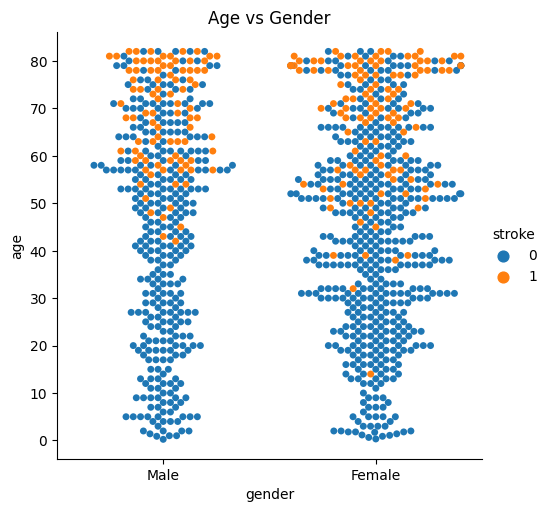

In [69]:
sns.catplot(x="gender", y="age", hue="stroke", kind="swarm", data=dataset[:1000])
plt.title("Age vs Gender")

/home/deborshi_roy/.local/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 74.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/deborshi_roy/.local/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 56.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Age vs marraige_status')

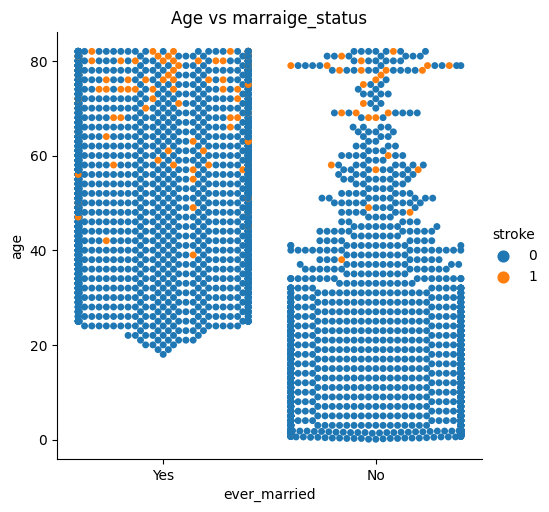

In [70]:
sns.catplot(x="ever_married", y="age", hue="stroke", kind="swarm", data=dataset)
plt.title("Age vs marraige_status")

/home/deborshi_roy/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

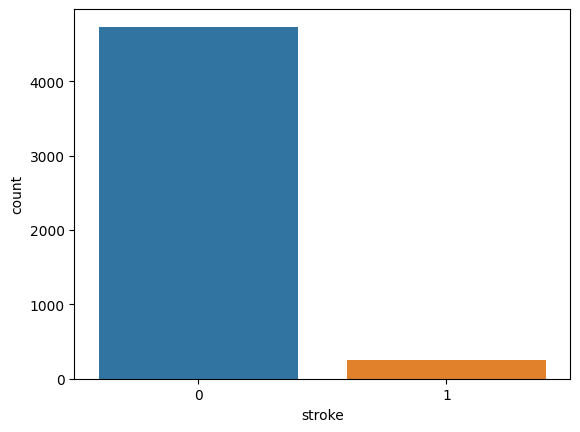

In [71]:
# Count plot for number of labels 
sns.countplot(dataset.stroke)

As we can see, there is high class imbalance, solving this using imblearn

In [72]:
dataset.shape

(4981, 11)

### As Hypertension and Heart Disease are categorical, so converting it from int64 to object

In [73]:
dataset["hypertension"] = dataset["hypertension"].values.astype(str)
dataset["heart_disease"] = dataset["heart_disease"].values.astype(str)

In [74]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   object 
 3   heart_disease      4981 non-null   object 
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 428.2+ KB


## Oversampling the dataset

In [75]:
train_data = dataset.drop("stroke", axis=1)
train_label = dataset["stroke"]

In [76]:
train_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked
...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes


In [77]:
oversample = RandomOverSampler(sampling_strategy="minority")
X, y = oversample.fit_resample(train_data, train_label)
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked
...,...,...,...,...,...,...,...,...,...,...
9461,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked
9462,Female,78.0,0,0,Yes,Private,Urban,106.74,33.0,formerly smoked
9463,Male,81.0,0,0,Yes,Self-employed,Urban,99.33,33.7,never smoked
9464,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes


/home/deborshi_roy/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

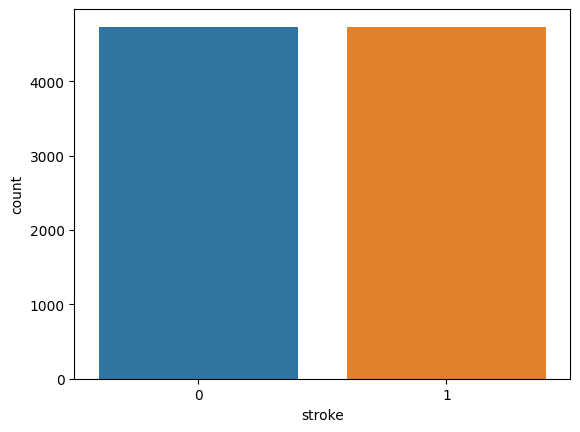

In [78]:
# ploting the dataset agein to see the result of oversampling 
sns.countplot(y)

### Creating heatmap

Text(0.5, 1.0, 'Correlation between different features')

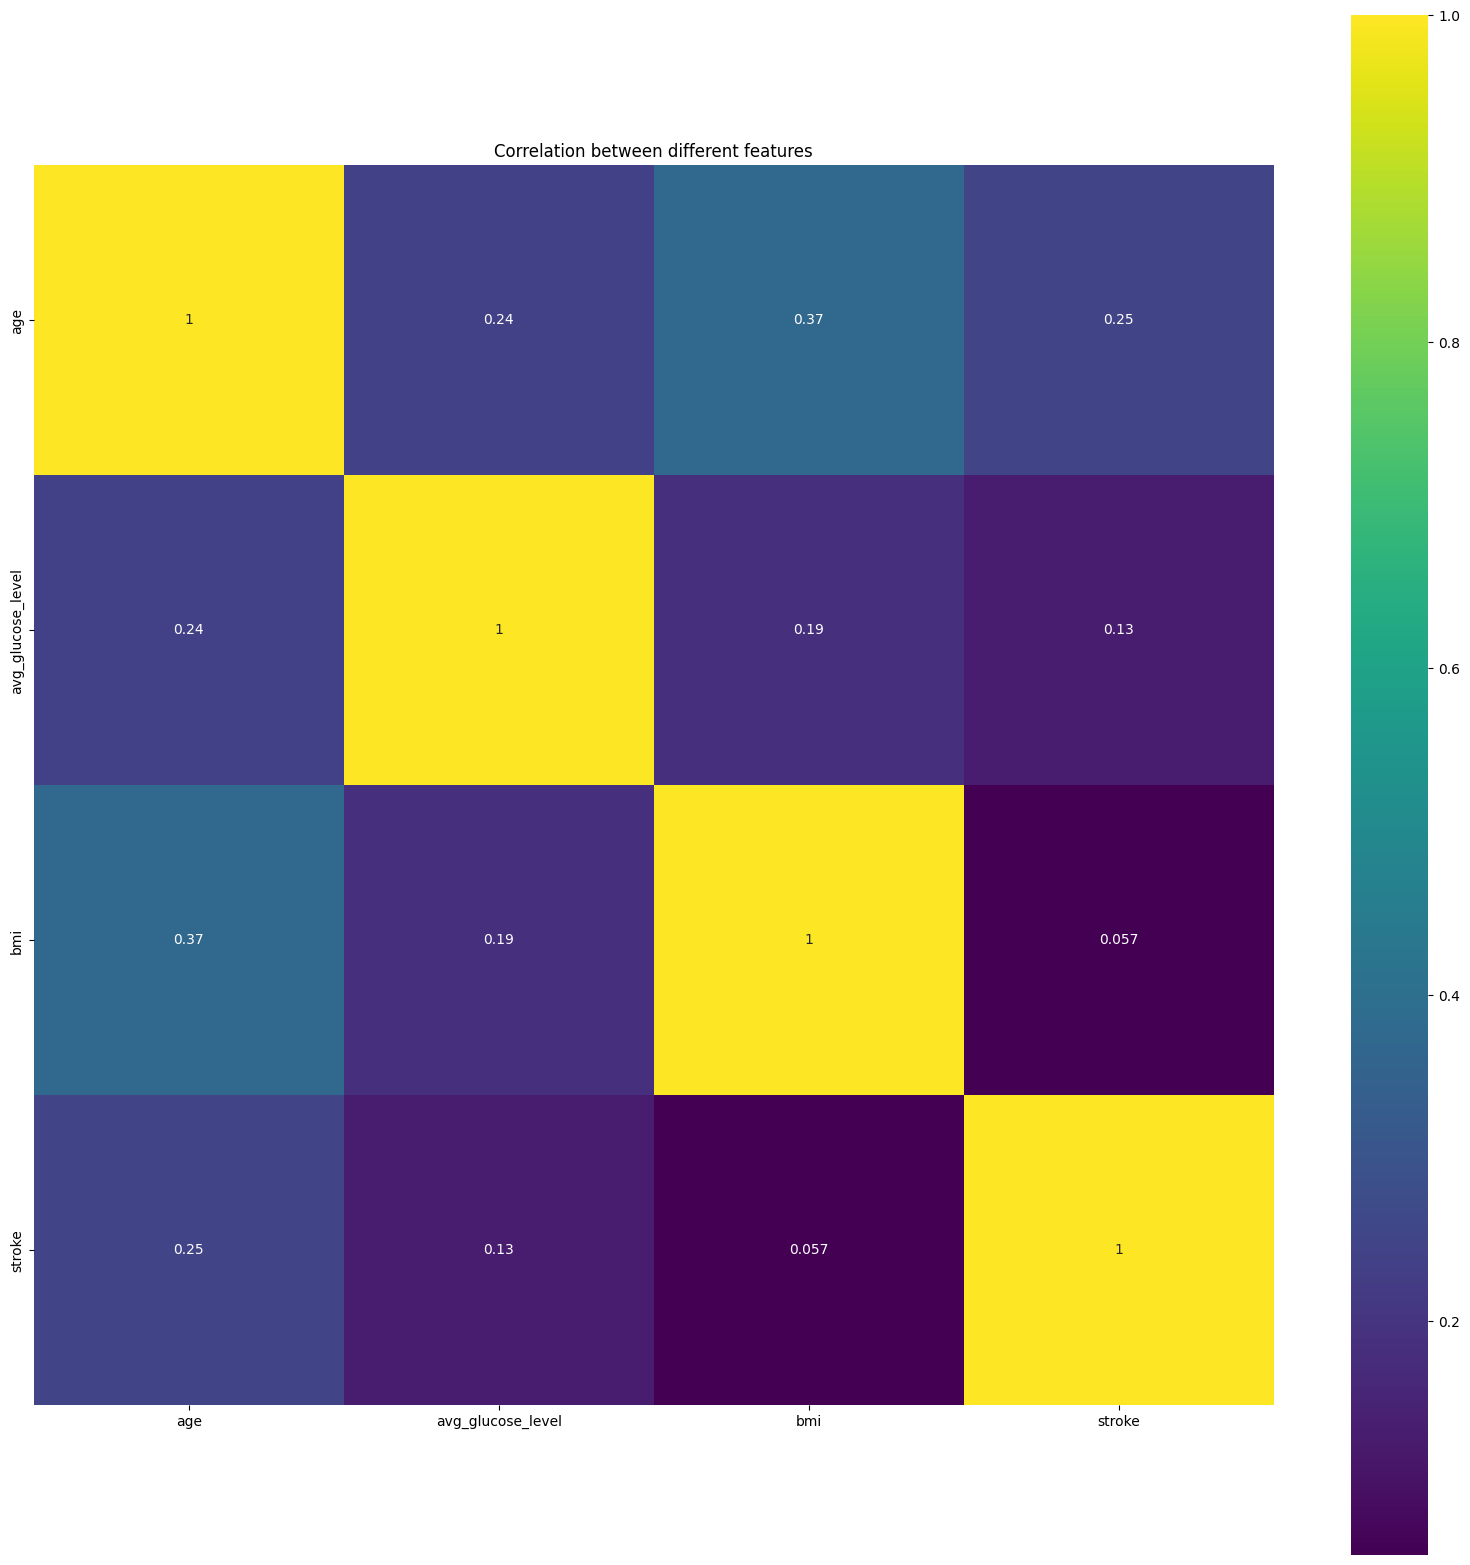

In [79]:
corr = dataset.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, vmax=1, square=True, annot=True, cmap="viridis")
plt.title("Correlation between different features")

## Numerical Encoding 

In [84]:
#converting categorical to numerical
train_data = pd.get_dummies(X)

len(train_data.columns)

21

In [38]:
scaler = MinMaxScaler()#MaxAbsScaler()
train_data = scaler.fit_transform(train_data)
train_data

array([[0.81689453, 0.80126489, 0.64756447, ..., 1.        , 0.        ,
        0.        ],
       [0.97558594, 0.23451205, 0.53008596, ..., 0.        , 1.        ,
        0.        ],
       [0.59716797, 0.53600776, 0.58452722, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.92675781, 0.39229988, 0.45558739, ..., 1.        , 0.        ,
        0.        ],
       [0.69482422, 0.10986982, 0.39255014, ..., 1.        , 0.        ,
        0.        ],
       [0.69482422, 0.74536054, 0.48710602, ..., 0.        , 0.        ,
        0.        ]])

## Splitting the dataset

In [39]:
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [40]:
X_train.shape

(7667, 21)

In [41]:
X_test.shape

(947, 21)

In [42]:
X_val.shape

(852, 21)

## Creating a model 

In [43]:
def plot(history):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(len(acc))

    sns.lineplot(epochs, acc, label="Training Accuracy")
    sns.lineplot(epochs, val_acc, label="Validation Accuracy")
    plt.title("Training Vs Validation Accuracy")
    plt.figure()
    sns.lineplot(epochs, loss, label="Training Loss")
    sns.lineplot(epochs, val_loss, label="Validation Loss")
    plt.title("Training Vs Validation Loss")

In [44]:
def model1():
    model = Sequential()
    model.add(Dense(60, input_shape=(X_train.shape[1],), activation=relu))
    model.add(Dense(80, activation=relu))
    model.add(Dense(1, activation=sigmoid))

    model.compile(loss=binary_crossentropy, optimizer=Adam(lr=0.003), metrics=["accuracy"]) # best results at 0.003

    return model

model1 = model1()
history1 = model1.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_val, y_val),
    shuffle=True
)

2022-08-08 00:34:07.952495: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-08 00:34:08.034692: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-08 00:34:08.034919: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-08 00:34:08.035641: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/100
240/240 [==============================] - 2s 3ms/step - loss: 0.5295 - accuracy: 0.7338 - val_loss: 0.4549 - val_accuracy: 0.7723
Epoch 2/100
240/240 [==============================] - 1s 2ms/step - loss: 0.4685 - accuracy: 0.7798 - val_loss: 0.4369 - val_accuracy: 0.8052
Epoch 3/100
240/240 [==============================] - 1s 2ms/step - loss: 0.4392 - accuracy: 0.7938 - val_loss: 0.4198 - val_accuracy: 0.8005
Epoch 4/100
240/240 [==============================] - 1s 2ms/step - loss: 0.4148 - accuracy: 0.8063 - val_loss: 0.3879 - val_accuracy: 0.8251
Epoch 5/100
240/240 [==============================] - 1s 2ms/step - loss: 0.3963 - accuracy: 0.8149 - val_loss: 0.3900 - val_accuracy: 0.8087
Epoch 6/100
240/240 [==============================] - 0s 2ms/step - loss: 0.3768 - accuracy: 0.8268 - val_loss: 0.3587 - val_accuracy: 0.8310
Epoch 7/100
240/240 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 0.8364 - val_loss: 0.3555 - val_accuracy: 0.8333

/home/deborshi_roy/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/deborshi_roy/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/deborshi_roy/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

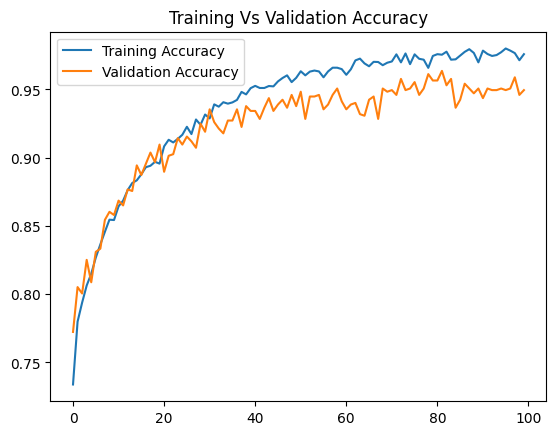

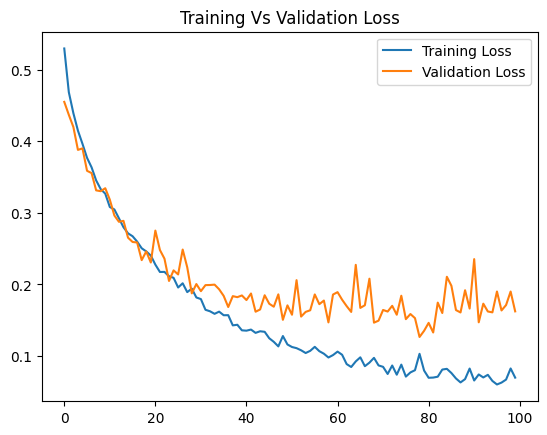

In [45]:
plot(history1)

In [46]:
import itertools
def plot_classification_matrix(y_pred):
  figsize = (10, 10)


  # Create the confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(20)
  ax.yaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

In [47]:
#model1.save("../model/model_brain_stoke.h5")

In [48]:
# evaluating using classification report
y_pred = model1.predict(X_test)
y_pred = tf.round(y_pred)
print(classification_report(y_pred=y_pred, y_true=y_test, target_names=["0", "1"]))

30/30 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       478
           1       0.94      0.97      0.96       469

    accuracy                           0.96       947
   macro avg       0.96      0.96      0.96       947
weighted avg       0.96      0.96      0.96       947



In [49]:
def model2():
    model = Sequential()
    model.add(Dense(128, input_shape=(X_train.shape[1],), activation=relu))
    model.add(Dense(256, activation=relu))
    model.add(Dense(256, activation=relu))
    model.add(Dense(512, activation=relu))
    model.add(Dense(1, activation=sigmoid))

    model.compile(loss=binary_crossentropy, optimizer=Adam(lr=0.003), metrics=["accuracy"]) # best results at 0.003

    return model

model2 = model2()
history2 = model2.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_val, y_val),
    shuffle=True
)

Epoch 1/100


/home/deborshi_roy/.local/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


240/240 [==============================] - 1s 3ms/step - loss: 0.5054 - accuracy: 0.7530 - val_loss: 0.4703 - val_accuracy: 0.7770
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 0.4529 - accuracy: 0.7869 - val_loss: 0.4059 - val_accuracy: 0.8052
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 0.4166 - accuracy: 0.8032 - val_loss: 0.4089 - val_accuracy: 0.8181
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3959 - accuracy: 0.8162 - val_loss: 0.3640 - val_accuracy: 0.8345
Epoch 5/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3758 - accuracy: 0.8278 - val_loss: 0.3612 - val_accuracy: 0.8451
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3590 - accuracy: 0.8377 - val_loss: 0.3383 - val_accuracy: 0.8615
Epoch 7/100
240/240 [==============================] - 1s 3ms/step - loss: 0.3437 - accuracy: 0.8422 - val_loss: 0.3018 - val_accuracy: 0.8580
Epoch 8/100

/home/deborshi_roy/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/deborshi_roy/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/deborshi_roy/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

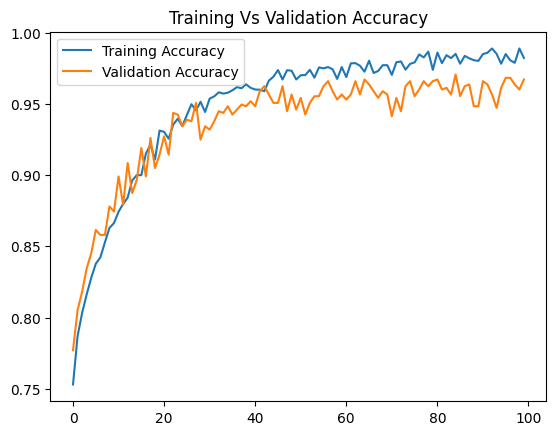

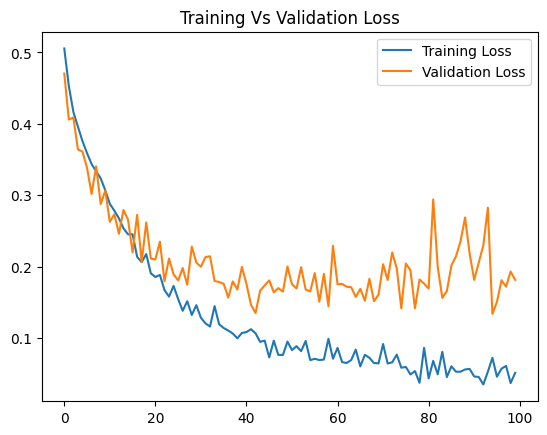

In [50]:
plot(history2)

30/30 [==============================] - 0s 1ms/step


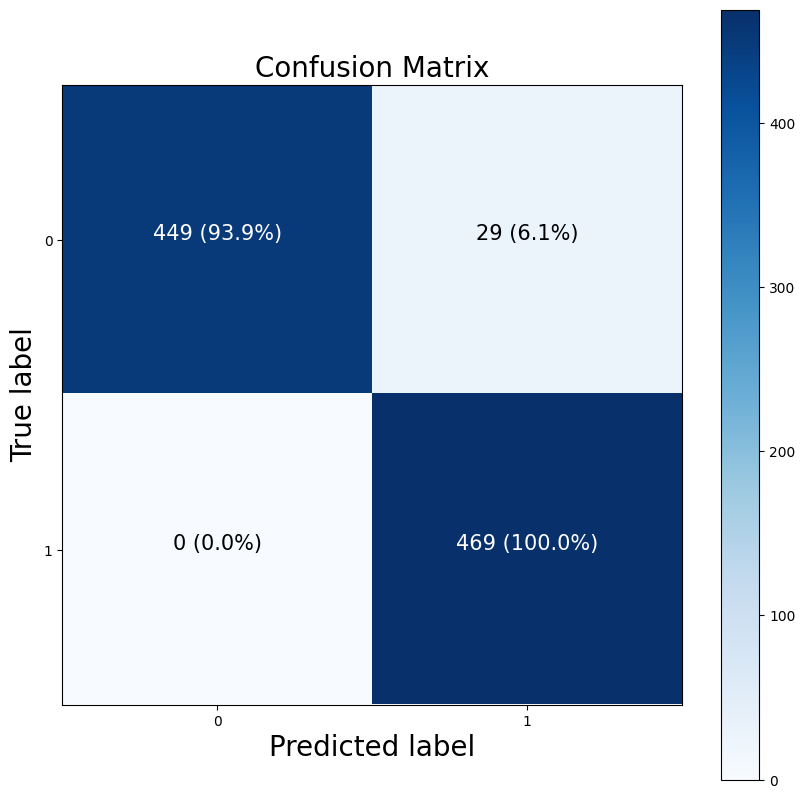

In [51]:
y_pred_2 = model2.predict(X_test)
y_pred_2 = tf.round(y_pred_2)
plot_classification_matrix(y_pred_2)

In [52]:
print(classification_report(y_pred_2, y_test))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       449
         1.0       1.00      0.94      0.97       498

    accuracy                           0.97       947
   macro avg       0.97      0.97      0.97       947
weighted avg       0.97      0.97      0.97       947



In [56]:
model2.save("../model/model_brain_stoke_3.h5")

30/30 [==============================] - 0s 2ms/step


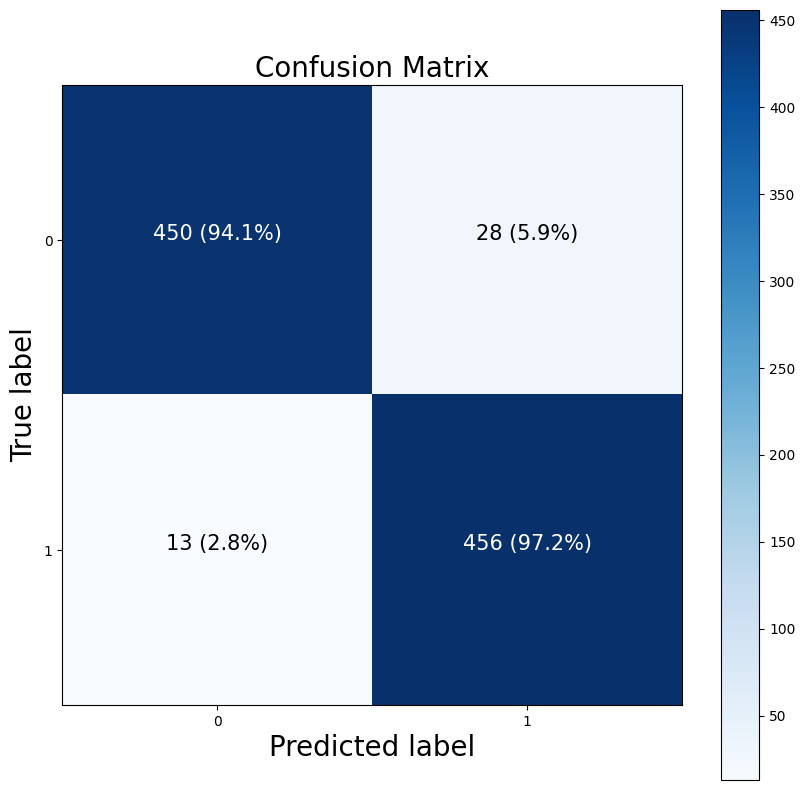

In [57]:
y_pred = model1.predict(X_test)
y_pred = tf.round(y_pred)
plot_classification_matrix(y_pred)

In [58]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       463
         1.0       0.97      0.94      0.96       484

    accuracy                           0.96       947
   macro avg       0.96      0.96      0.96       947
weighted avg       0.96      0.96      0.96       947

